In [2]:
#tugas 15
import pandas as pd
df = pd.read_csv("lung_cancer.csv")
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


C:\Users\Novia\AppData\Local\Temp\ipykernel_11068\2059844501.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = df[df['diagnosis_date'].isin(['2016-07-07', '2021-07-07'])]


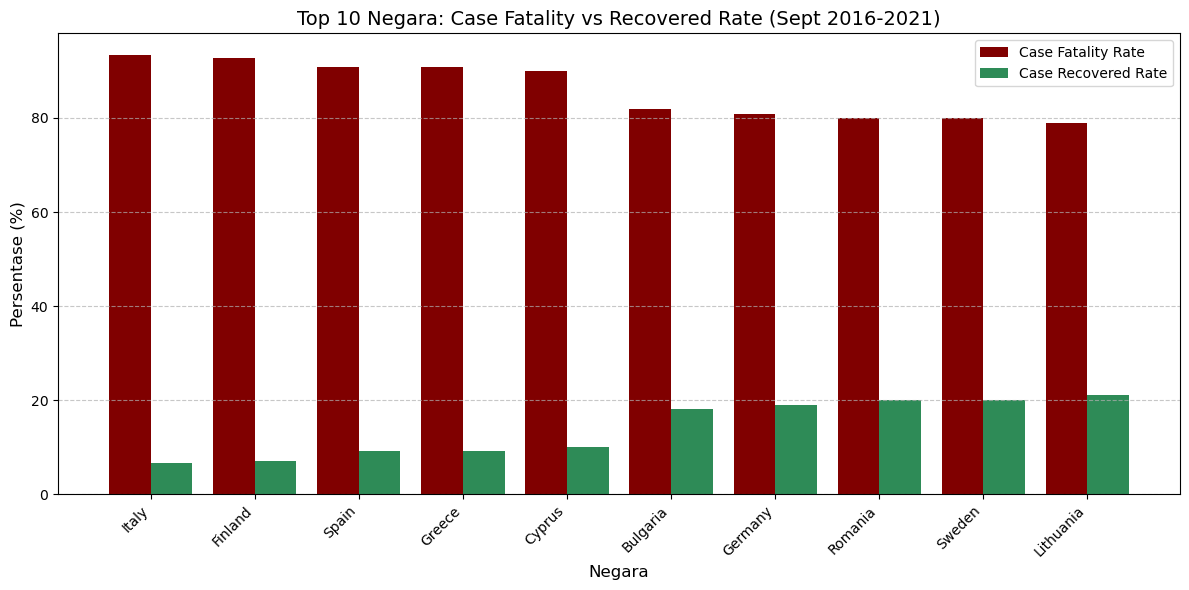

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lung_cancer.csv") 
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])  

filtered_df = df[df['diagnosis_date'].isin(['2016-07-07', '2021-07-07'])]

agg_df = filtered_df.groupby('country').agg({
    'survived': ['sum', 'count']
})
agg_df.columns = ['survived_count', 'total_cases']
agg_df['fatality_count'] = agg_df['total_cases'] - agg_df['survived_count']

agg_df['Case Fatality Rate'] = (agg_df['fatality_count'] / agg_df['total_cases']) * 100
agg_df['Case Recovered Rate'] = (agg_df['survived_count'] / agg_df['total_cases']) * 100

top_countries = agg_df.sort_values(by='Case Fatality Rate', ascending=False).head(10).reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_countries))

plt.bar(x, top_countries["Case Fatality Rate"], width=bar_width, label="Case Fatality Rate", color="maroon")
plt.bar([i + bar_width for i in x], top_countries["Case Recovered Rate"], width=bar_width, label="Case Recovered Rate", color="seagreen")
plt.xlabel("Negara", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.title("Top 10 Negara: Case Fatality vs Recovered Rate (Sept 2016-2021)", fontsize=14)
plt.xticks([i + bar_width/2 for i in x], top_countries["country"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
